# Problema 1

Un equipo de desarrollo está evaluando la eficiencia de un nuevo algoritmo implementado en *Python*. Han medido el tiempo de ejecución del algoritmo en función de la cantidad de elementos de entrada, obteniendo los resultados que se muestran en la siguiente tabla:

<p><center>

| Cantidad de elementos (unidades) | Tiempo de ejecución (ms) |
|----------------------------------|--------------------------|
|$$ 100 $$                         | $$2 $$                   |
|$$ 200 $$                         | $$4 $$                   |
|$$ 500 $$                         | $$10 $$                  |
|$$ 1.000 $$                        | $$20 $$                  |
|$$ 2.000 $$                        | $$40 $$                  |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Encuentra la función que relaciona el tamaño de la entrada con el tiempo de ejecución del algoritmo, para esto utiliza la función *polyfit* de *Numpy*.
3. Calcula el tiempo de ejecución para una entrada de $1.500$ elementos.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño de entrada que haría que el tiempo de ejecución sea de $50$ milisegundos.


# Solución

**1)**

**Variable dependiente**: tiempo de ejecución (ms)<br/>
**Variable independiente**: Cantidad de elementos (unidades)

**2)**

In [1]:
import numpy as np

n_elements = np.array([100, 200, 500, 1_000, 2_000])
ms = np.array([2, 4, 10, 20, 40])

m, n = np.polyfit(n_elements, ms, 1)

print(f"La función buscada es y = {m:.2f} * x + {n:.1f}")

La función buscada es y = 0.02 * x + 0.0


**3)**

In [2]:
def exec_time(n_elem):
    return m * n_elem + n

print(f"El tiempo de ejecución para una entrada de 1500 elementos es de {exec_time(1500):.1f} ms")

El tiempo de ejecución para una entrada de 1500 elementos es de 30.0 ms


**4)**

In [13]:
from scipy.optimize import fsolve
import numpy as np

def exec_time_50(n_elem):
    return exec_time(n_elem) - 50

x = np.linspace(0,3000,1)

root = fsolve(exec_time_50,x)

print(f"Deben haber aproximadamente {root[0]:.0f} elementos para que el tiempo de ejecución sea de 50 ms")

Deben haber aproximadamente 2500 elementos para que el tiempo de ejecución sea de 50 ms


# Problema 2

Un equipo de TI está monitoreando el tráfico de datos en la red de la empresa. Han registrado el volumen de los datos transferidos y el tiempo que tomó cada transferencia en la siguiente tabla de datos:

<p><center>

|Datos transferidos (GB) | Tiempo de transferencia (min)|
|------------------------|------------------------------|
|$$5$$                   |$$10$$                        |
|$$10$$                  |$$20$$                        |
|$$25$$                  |$$50$$                        |
|$$50$$                  |$$100$$                       |
|$$100$$                 |$$200$$                       |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Utilizando la función *polyfit* de *Numpy* encuentra la función que modela el tiempo de transferencia $T(x)$ en función del volumen de los datos transferidos.
3. Interprete la pendiente en el contexto del problema.
4. ¿Cuánto tiempo toma una transferencia de $73,2$ GB?
5. Utiliza la función *fsolve* de *Scipy* para determinar la cantidad de datos que se puedan transferir en $123,5$ minutos.
6. Grafica la función $T(x)$ indicando el nombre de los ejes y su unidad de medida. Interpreta lo observado. *Para graficar utiliza la biblioteca Matplotlib.*

# Solución

**1)**

**Variable dependiente**: Tiempo (min)<br />
**Variable independiente**: Datos transferidos (GB)

**2)**

In [4]:
import numpy as np

data = [5, 10, 25, 50, 100]
time = [10, 20, 50 ,100 ,200]

m, n = np.polyfit(data, time, 1)

print(f"La función buscada es y = {m:.1f} * x + {n:.1f}")

La función buscada es y = 2.0 * x + 0.0


**3)**

Cuánto aumenta la transferencia de datos en una unidad de tiempo, en este caso, minutos.

**4)**

In [5]:
def calc_time(data):
    return m * data + n

print(f"Una transferencia de 72,3 BG demora aproximadamente {calc_time(72.3):.1f} minutos")


Una transferencia de 72,3 BG demora aproximadamente 144.6 minutos


**5)**

In [10]:
from scipy.optimize import fsolve
import numpy as np

def t(d):
    return m * d + n - 123.5

d = np.linspace(0, 100, 1)

roots = fsolve(t,d)

print(f"La cantidad de datos que se puede transferir en 123.5 minutos es de aproximadamente {roots[0]:.1f} GB")

La cantidad de datos que se puede transferir en 123.5 minutos es de aproximadamente 61.7 GB


**6)**

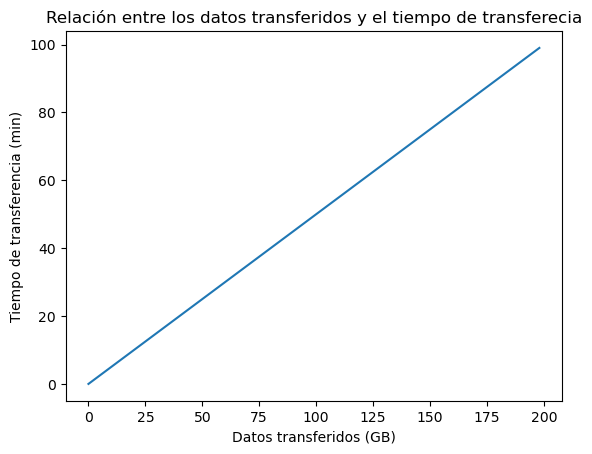

In [13]:
import matplotlib.pyplot as plt
import numpy as np

gb = np.arange(0, 100, 1)

plt.plot(calc_time(gb), gb)
plt.xlabel("Datos transferidos (GB)")
plt.ylabel("Tiempo de transferencia (min)")
plt.title("Relación entre los datos transferidos y el tiempo de transferecia")

plt.show()

# Problema 3


Una empresa de tecnología quiere optimizar el tiempo de carga y descarga de archivos en su servicio de almacenamiento en la nube. Los tiempos medios para diferentes tamaños de archivos son los siguientes:

<p><center>

| Tamaño del archivo (MB) | Tiempo de carga (s) | Tiempo de descarga (s)|
|-------------------------|---------------------|-----------------------|
|$$50$$                   |$$10$$               |$$8$$                  |
|$$100$$                  |$$20$$               |$$16$$                 |
|$$250$$                  |$$50$$               |$$40$$                 |
|$$500$$                  |$$100$$              |$$80$$                 |
|$$1.000$$                 |$$200$$              |$$160$$                |

</center></p>

1. Encuentra las funciones que modelan el tiempo de carga $f(x)$ y el tiempo de descarga $g(x)$ en función del tamaño del archivo $x$. Utiliza la función *polyfit* de *Numpy* (debes encontrar dos funciones).
2. Define variable dependiente e independiente, para ambas funciones, indicando su unidad de medida.
3. Calcula el tiempo de carga y descarga para un archivo de $750$ MB.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño del archivo si el tiempo de carga es de $163$ segundos.
5. Un trabajador insiste en que si el tiempo de descarga es de $195$ segundos, el tamaño del archivo es $1.200$ MB. ¿Tiene razón? Utiliza *Python* para determinar.
6. Grafica ambas funciones en el mismo gráfico, indicando nombre de los ejes y unidades de medida. Utiliza la librería *Matplotlib* para graficar.

# Solución

**1)**

In [18]:
import numpy as np

file_size = np.array([50, 100, 250, 500, 1000])
load_time = np.array([10, 20, 50, 100, 200])
download_time = np.array([8, 16, 40, 80, 160])

m1, n1 = np.polyfit(file_size, load_time, 1)
m2, n2 = np.polyfit(file_size, download_time, 1)

print(f"La función que modela el tiempo de carga en función del tamaño del archivo es y = {m1:.2f} * x + {n1}")
print(f"La función que modela el tiempo de descarga en función del tamaño del archivo es y = {m2:.2f} * x + {n2}")

La función que modela el tiempo de carga en función del tamaño del archivo es y = 0.20 * x + 2.542114972925208e-14
La función que modela el tiempo de descarga en función del tamaño del archivo es y = 0.16 * x + 1.906586229693906e-14


**2)**

### Para f(x)
**Variable dependiente**: Tiempo de carga (s) <br/>
**Variable independiente**: Tamaño del archivo (MB)

### Para g(x)
**Variable dependiente**: Tiempo de descarga (s) <br/>
**Variable independiente**: Tamaño del archivo (MB)

**3)**

In [21]:
def calc_load_time(x):
    return m1 * x + n1

def calc_download_time(x):
    return m2 * x + n2

print(f"El tiempo de carga para un archivo de 750MB es de aproximadamente {calc_load_time(750):.1f} segundos")
print(f"El tiempo de descarga para un archivo de 750MB es de aproximadamente {calc_download_time(750):.1f} segundos")

El tiempo de carga para un archivo de 750MB es de aproximadamente 150.0 segundos
El tiempo de descarga para un archivo de 750MB es de aproximadamente 120.0 segundos


**4)**

In [23]:
from scipy.optimize import fsolve
import numpy as np

def calc_load_time_163(x):
    return m1 * x + n1 - 163

mb = np.linspace(0,1000,1)

roots = fsolve(calc_load_time_163, mb)

print(f"El tamaño del archivo para que el tiempo de carga sea de 163 segundos es aproximadamente {roots[0]:.1f} MB")

El tamaño del archivo para que el tiempo de carga sea de 163 segundos es aproximadamente 815.0 MB


**5)**

In [27]:
from scipy.optimize import fsolve
import numpy as np

def calc_download_time_195(x):
    return m2 * x + n2 - 195

mb = np.linspace(0, 1500, 1)

roots = fsolve(calc_download_time_195, mb)

print(f"El tamaño del archivo para que el tiempo de descaga sea de 195 segundos es aproximadamente {roots[0]:.1f} MB")

if round(roots[0]) == 1200:
    print("El trabajador tiene la razón")
else:
    print("El trabajador está equivocado")

El tamaño del archivo para que el tiempo de descaga sea de 195 segundos es aproximadamente 1218.7 MB
El trabajador está equivocado


**6)**

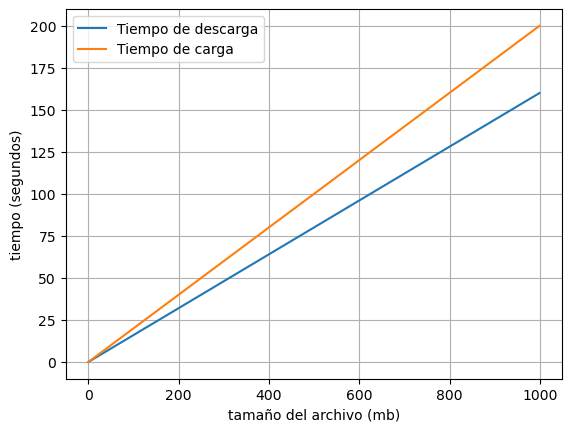

In [37]:
import matplotlib.pyplot as plt
import numpy as np

mb = np.arange(0,1000)

plt.plot(mb, calc_download_time(mb), label="Tiempo de descarga")
plt.plot(mb, calc_load_time(mb), label="Tiempo de carga")

plt.xlabel("tamaño del archivo (mb)")
plt.ylabel("tiempo (segundos)")

plt.grid(True)
plt.legend()
plt.show()

# Problema 4

El uso de memoria $M(x)$ (en GB) de un servidor en función del número de usuarios activos $x$ está dado por la función lineal:

 $$M(x) = 0.5x + 2$$

1. Determina la variable dependiente e independiente, indicando unidad de medida.
2. Identifica e interpreta la pendiente de la función.
3. ¿Cuánta memoria del servidor está en uso cuando no hay usuarios activos?
4. ¿Cuánta memoria del servidor está en uso cuando hay $637$ usuarios activos?
5. Utiliza *Python* para determinar cuántos usuarios activos provocan un uso de memoria de $32$ GB.
6. ¿Es posible un uso de memoria de $59,8$ GB?

# Solución

**1)**

**Variable dependiente**: Uso de memoria (GB) <br />
**Variable independiente**: Número de usuarios activos (unidades)

**2)**

La pendiente de la función es $0.5$, y representa la variación del uso de memoria por usuario activo

**3)**

Si hay 0 usuarios activos implica que $x = 0$
$$M(x) = 0.5x + 2$$
$$M(x) = 0.5\cdot0 + 2$$
$$M(x) = 2$$

Hay 2GB de memoria en uso cuando no hay usuarios activos

**4)**

Con $x = 637$

$$M(x) = 0.5x + 2$$
$$M(x) = 0.5\cdot637 + 2$$
$$M(x) = 320.5$$

Hay 320.5 GB de memoria en unso cuando hay 637 usuarios activos


**5)**

In [40]:
from scipy.optimize import fsolve
import numpy as np

def memmory_usage(n_users):
    return 0.5 * n_users + 2

def mem_usage_32(n_users):
    return memmory_usage(n_users) - 32

users = np.linspace(0,100,1)

roots = fsolve(mem_usage_32, users)

print(f"Deben existir {roots[0]:.1f} usuarios activos para que el uso de memoria sea de 32GB")


Deben existir 60.0 para que el uso de memoria sea de 32GB


**6)**

$59.8$ no pertenece al rango de la función

In [42]:
def mem_usage_598(n_users):
    return memmory_usage(n_users) - 59.8

users = np.linspace(0, 130,1)

roots = fsolve(mem_usage_598, users)

print(f"Para que hubiese un uso de memoria de 59.8 GB es necesario tener {roots[0]} usuarios activos, pero {roots[0]} no pertenece al dominio de la función")

Para que hubiese un uso de memoria de 59.8 GB es necesario tener 115.6 usuarios activos, pero 115.6 no pertenece al dominio de la función


# Problema 5

El costo de operación mensual $C(x)$ (en miles de dólares) de un data center en función del número de servidores $x$ está dado por la función lineal:

 $$C(x) = 1,5x + 10$$

1. Determine la variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente en el contexto del problema?
3. ¿Qué representa el intercepto en el contexto del problema?
4. Calcula el costo de operación cuando hay $47$ servidores.
5. Determina cuántos servidores hay cuando el costo de operación es de $92.500$ dólares. Utiliza *Python* para resolver.


# Solución

**1)**

**Variable dependiente**: costo de operación mensual (miles de dólares)<br />
**Variable independiente**: número de servidores (unidades)

**2)**

El aumento del costo (en miles de dólares) por servidor

**3)**

El costo inicial de operar un data center sin servidores activos

**4)**

In [2]:
def server_cost(n_servers):
    return 1.5 * n_servers + 10

print(f"El costo de operación de 47 servidores es {server_cost(47)} miles de dólares")

El costo de operación de 47 servidores es 80.5 miles de dólares


**5)**

In [11]:
from scipy.optimize import fsolve
import numpy as np

def server_cost_92500(n_servers):
    return server_cost(n_servers) - 92.5

n_servers = np.linspace(0,50,1)

roots = fsolve(server_cost_92500, 50)

print(f"Hay {roots[0]:.0f} servidores para que el costo de mantener el data center sea de 92.500 dólares")

Hay 55 servidores para que el costo de mantener el data center sea de 92.500


# Problema 6

El número de visitas diarias $V(x)$ en un sitio web, en función del número de campañas publicitarias $x$, está modelado por la función:

$$V(x) = 300x + 500$$

Los administradores del sitio consideran contratar $20$ campañas publicitarias como máximo.

1. Defina variable dependiente e independiente del problema, indicando unidad de medida.
2. Determine el dominio contextualizado de la función.
3. Interprete la pendiente de la función en el contexto del problema.
4. Determine la cantidad de visitas diarias cuando se ejecutan $5$ campañas publicitarias.
5. Utilizando la función *fsolve* de *Scipy* responde: ¿cuántas campañas publicitarias se deben ejecutar para alcanzar $4.700$ visitas diarias?

# Solución

**1)**

**Variable dependiente**: número de visitas diarias (unidades)<br />
**Variable independiente**: número de campañas publicitarias (unidades)

**2)**

$$D: \{x \in \mathbb{N}\}

**3)**

La pendiente de la recta representa el aumento de número de visitas por campaña publicitaria realizada

**4)**

In [13]:
def calc_visits(n_campaigns):
    return 300 * n_campaigns + 500

print(f"La cantidad de visitas diarias es de {calc_visits(5)} para 5 campañas publicitarias realizadas")

La cantidad de visitas diarias es de 2000 para 5 campañas publicitarias realizadas


**5)**

In [15]:
from scipy.optimize import fsolve
import numpy as np

def calc_visits_4700(n_campaigns):
    return calc_visits(n_campaigns) - 4700

n_campaigns = np.linspace(0,15,1)

roots = fsolve(calc_visits_4700, n_campaigns)

print(f"Para que hayan 4,700 visitas deben realizarse {roots[0]:.0f} campañas publicitarias")

Para que hayan 4,700 visitas deben realizarse 14 campañas publicitarias


# Problema 7

La depreciación es el proceso en que los activos físicos, como la maquinaria, vehículos, equipos, etc., pierden valor con el tiempo debido a factores como el desgaste, el uso y la obsolescencia. El valor estimado que tendrá el activo al final de su vida útil se conoce como *valor residual*.

En este contexto, sabemos que el valor residual $R(t)$ (en miles de dólares) de un equipo tecnológico está modelado por la función lineal:

$$R(t) = -1,2t + 10$$

donde $t$ corresponde a la antigüedad del equipo (en años).

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente de la función en el contexto del problema?
3. ¿Cuál es el valor residual inicial del equipo?
4. Determine el dominio contextualizado de la función, si sabe que el valor del equipo al final de su vida útil es de $400$ dólares.
5. Determina, utilizando la función *def* de *Python*, el valor residual del equipo con $3$ años y seis meses de antigüedad.
6. Determina, utilizando la función *fsolve*  de *Scipy*, la antigüedad del equipo cuando su valor residual es de $4.000$ dólares.
7. Grafica la función utilizando la biblioteca *Matplotlib*. Interpreta lo observado.

# Solución

**1)**

**Variable dependiente**: valor residual (miles de dólares)<br />
**Variable independiente**: antigüedad del equipo (años)

**2)**

La disminución del valor del equipo por año transcurrido

**3)**

$10,000$ dólares

**4)**

Si el valor residual final es de $400$ dólares

$$0.4 = -1.2t + 10$$
$$-9.6 = -1.2t$$
$$t = 8$$

Por lo tanto el dominio contextualizado de la función es:

$$ D: \{x \in \mathbb{R} \ | \ 0 \leq x \leq 8  \}

**5)**

In [17]:
def calc_residual_cost(years):
    return -1.2 * years + 10

print(f"El valor residual transurrido 3 años y 6 meses es de {(calc_residual_cost(3.5) * 1000):.0f} dólares")

El valor residual transurrido 3 años y 6 meses es de 5800 dólares


**6)**

In [21]:
from scipy.optimize import fsolve
import numpy as np

def calc_residual_cost_4000(years):
    return calc_residual_cost(years) - 4

years = np.linspace(0,8,1)

roots = fsolve(calc_residual_cost_4000, years)

print(f"Tuvieron que pasar {roots[0]:.0f} años para que el valor residual sea de 4000 dólares")

Tuvieron que pasar 5 años para que el valor residual sea de 4000 dólares


**7)**

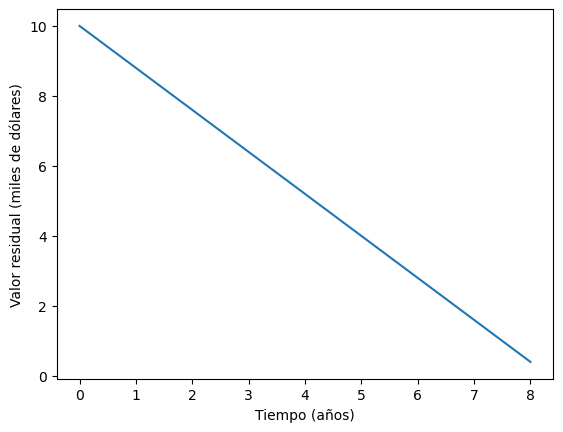

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

years = np.arange(0,9)

ax.plot(years, calc_residual_cost(years))
ax.set_xlabel("Tiempo (años)")
ax.set_ylabel("Valor residual (miles de dólares)")

plt.show()

# Problema 8

El tiempo de ejecución $T(x)$ (en milisegundos) de un algoritmo depende de la cantidad de elementos de entrada (en unidades) mediante una función lineal cuya gráfica se muestra en la siguiente imagen:

<br>

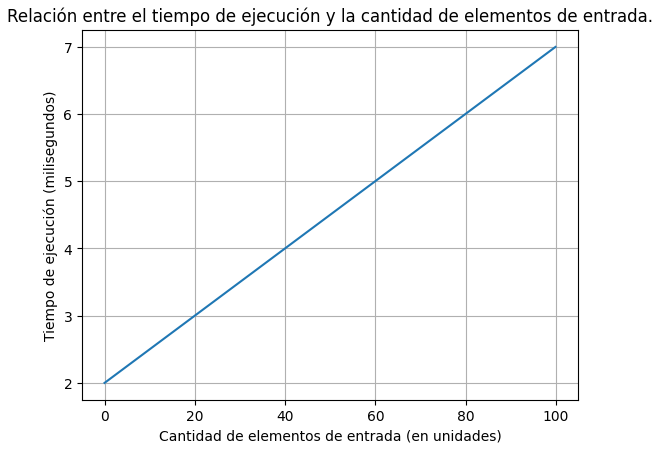

<br>

1. Determina la forma algebraica de la función que mejor se ajusta al gráfico. Utiliza la función polyfit de Scipy para calcular.
2. Determina el tiempo de ejecución del algoritmo para $67$ elementos de entrada.
3. ¿Cuántos elementos de entrada se utilizaron si el tiempo de ejecución fue de $6,4$ milisegundos?

# Solución

**1)**

In [4]:
import numpy as np

exec_time = [2,3,4,5,6,7]
n_ele = [0,20,40,60,80,100]

m, n = np.polyfit(n_ele, exec_time, 1)

print(f"La función que más se ajusta al gráfico es y = {m:.2f} * x + {n:.0f}")

La función que más se ajusta al gráfico es y = 0.05 * x + 2


**2)**

In [7]:
def exec_time(n_ele):
    return m * n_ele + n

print(f"El tiempo de ejecución del algoritmo para 67 elementos es de {exec_time(67):.2f} ms")

El tiempo de ejecución del algoritmo para 67 elementos es de 5.35 ms


**3)**

In [10]:
from scipy.optimize import fsolve
import numpy as np

def exec_time_64(n_ele):
    return exec_time(n_ele) - 6.4

n_ele = np.linspace(0, 100, 1)

roots = fsolve(exec_time_64, n_ele)

print(f"Se utilizaron {roots[0]:.0f} elementos para que el tiempo de ejecución sea de 6.4 milisegundos")

Se utilizaron 88 elementos para que el tiempo de ejecución sea de 6.4 milisegundos


# Problema 9

El consumo de energía de un servidor $E(t)$  en función del tiempo $t$ después de implementar una optimización, está modelado por la función lineal que se observa en el siguiente gráfico:

<br>

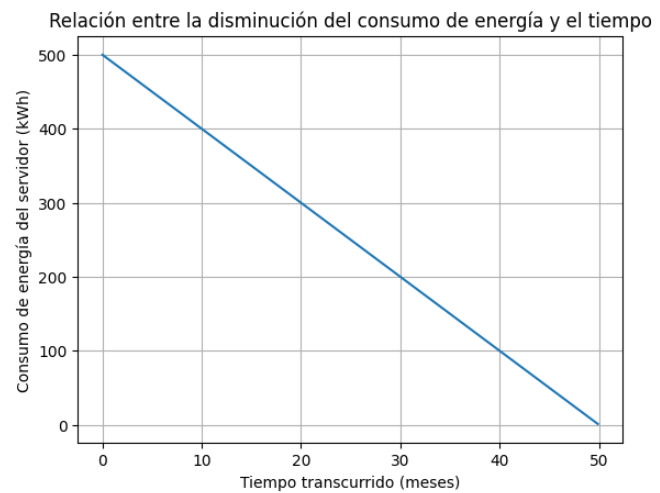

<br>

1. Utiliza la función *polyfit* de *Numpy* para determinar la forma algebraica que mejor se ajusta al gráfico.
2. Interprete la pendiente en el contexto del problema.
3. Determine el consumo de energía luego de un año desde que se implementó la optimización.
4. Encuentre el tiempo transcurrido desde la implementación de la optimización para que la energía consumida sea de $200$ kWh.

# Solución

**1)**

In [66]:
import numpy as np

months = [0, 10, 20, 30, 40, 50]
kwh = [500, 400, 300, 200, 100, 0]

m, n = np.polyfit(months, kwh, 1)

print(f"La función que más se ajusta al gráfico es y = {m:.1f} * x + {n:.1f}")

La función que más se ajusta al gráfico es y = -10.0 * x + 500.0


**2)**

La pendiente de la recta representa la velocidad a la cual el consumo de energía disminuye transcurrido un período de tiempo determinado.

**3)**

In [71]:
def calc_energy(months):
    return m * months + n

print(f"El consumo de energía luego de un año es de {calc_energy(12)} KWh")

El consumo de energía luego de un año es de 380.0 KWh


**4)**

In [73]:
from scipy.optimize import fsolve
import numpy as np

def calc_energy_200(months):
    return calc_energy(months) - 200

months = np.linspace(0, 40, 1)

roots = fsolve(calc_energy_200, months)

print(f"Han transcurrido {roots[0]:.1f} meses para que el consumo de energía sea de 200 KWh")

Han transcurrido 30.0 meses para que el consumo de energía sea de 200 KWh


# Problema 10

Dos atletas profesionales corren por un camino recto. Durante los primeros $10$ segundos del trayecto, la distancia recorrida (en metros) por el atleta $1$ está dada por la función:

$$g(t) = 0,7t^{2}$$

mientras que la distancia recorrida por el atleta $2$ está dada por la función:

$$f(t) = 10t $$

donde $t$ corresponde al tiempo transcurrido (en segundos) desde el inicio del trayecto.

<br>

1. ¿Cuál de los dos atletas siempre mantuvo una velocidad constante? Justifique. *Recomendación: grafica las funciones utilizando Matlplotlib.*
2. Si la meta se encontraba a $100$ metros de la partida ¿cuál atleta llega primero?
3. ¿A qué distancia se encontraban uno del otro cuando transcurren $8$ segundos? ¿Y cuando transcurren $10$ segundos?
4. Entre el segundo $8$ y el $10$, ¿cuál atleta iba más rápido? Justifique apropiadamente.

# Solución

**1)**

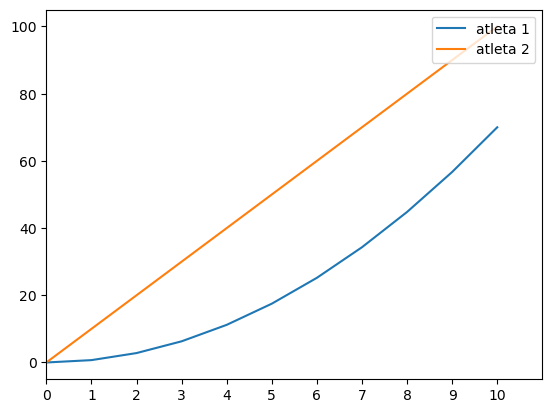

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def g(t):
    return 0.7 * t ** 2

def f(t):
    return 10 * t

t = np.arange(0,11)

fig, ax = plt.subplots()

ax.plot(t, g(t), label="atleta 1")
ax.plot(t, f(t), label="atleta 2")
ax.set_xlim((0,11))
ax.set_xticks(range(0,11))

ax.legend(loc="upper right")
plt.show()

El atleta 2 tuvo una velocidad constante a lo largo de la carrera debido a que la función que modela su recorrido en un tiempo determinado es una línea recta ascendente, mientras que el atleta tuvo un aumento gradual en su velocidad.

**2)**

In [58]:
from scipy.optimize import fsolve
import numpy as np

def g_100(t):
    return g(t) - 100

def f_100(t):
    return f(t) - 100

t = np.linspace(0, 10)

g_roots = fsolve(g_100, t)
f_roots = fsolve(f_100, t)

print(f"El atleta 1 se demoró {g_roots[0]} segundos en alcanzar los 100 metros")
print(f"El atleta 2 se demoró {f_roots[0]} segundos en alcanzar los 100 metros")

if g_roots[0] > f_roots[0]:
    print("El atleta 2 llega primero")
else:
    print("El atleta 1 llega primero")

El atleta 1 se demoró 11.952286102525933 segundos en alcanzar los 100 metros
El atleta 2 se demoró 10.0 segundos en alcanzar los 100 metros
El atleta 2 llega primero


**3)**

In [64]:
print(f"A los 8 segundos el atleta 1 recorrió {g(8)} metros, y el atleta 2 recorrió {f(8)} metros, habia una distancia de {abs(g(8) - f(8))} metros entre ellos")
print(f"A los 10 segundos el atleta 1 recorrió {g(10)} metros, y el atleta 2 recorrió {f(10)} metros, habia una distancia de {abs(g(10) - f(10))} metros entre ellos")

A los 8 segundos el atleta 1 recorrió 44.8 metros, y el atleta 2 recorrió 80 metros, habia una distancia de 35.2 metros entre ellos
A los 10 segundos el atleta 1 recorrió 70.0 metros, y el atleta 2 recorrió 100 metros, habia una distancia de 30.0 metros entre ellos


**4)**

La velocidad se define como la distancia recorrida en un período de tiempo determinado, en este caso, ya calculamos las distancias recorridas, por lo tanto:

**Atleta 1**

$$v1 = \frac{70 - 44.8}{2}\space m/s$$
$$v1 = \frac{25.2}{2}\space m/s$$
$$v1 = 12.6\space m/s$$

**Atleta 2**

$$v2 = \frac{100 - 80}{2}\space m/s$$
$$v2 = \frac{20}{2}\space m/s$$
$$v2 = 10\space m/s$$

Se puede concluir entonces que el atleta 1 fue más rápido entre el segundo 8 y el 10

# Problema 11

Un *Data Center* ha cotizado el costo de desarrollar un proyecto con dos empresas. El costo (en millones de pesos) entregado por la empresa $1$ está modelado por la función:

$$C_{1}(t) = 12t + 50$$

y costo (en millones de pesos) entregado por la empresa $2$ está modelado por la función:

$$C_{2}(t) = 8t + 100$$

donde $t$ corresponde al tiempo que demoren en realizar el proyecto (en semanas).

<br>

1. Utilizando la biblioteca *Matplotlib* grafique ambas funciones, indicando el nombre de los ejes coordenados junto con su unidad de medida.
2. Si con la empresa $1$ pagaron $155$ millones de pesos ¿cuántas semanas duró el trabajo?
3. Analizando el gráfico de la pregunta $1$, determine: ¿cuándo conviene desarrollar el proyecto con la empresa $1$? ¿Y la empresa $2$?

# Solución

**1)**

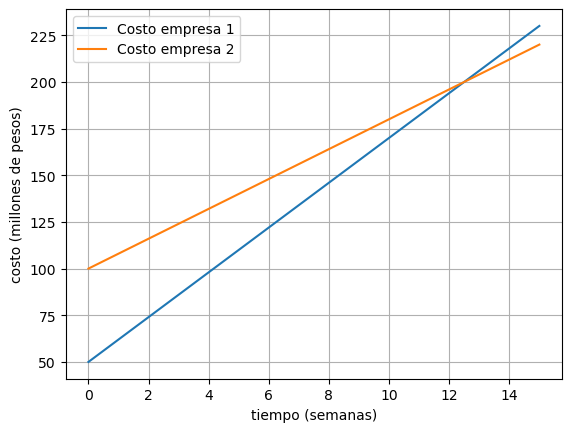

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def calc_cost_1(time):
    return 12 * time + 50

def calc_cost_2(time):
    return 8 * time + 100

time = np.linspace(0,15)

plt.plot(time,calc_cost_1(time), label="Costo empresa 1")
plt.plot(time,calc_cost_2(time), label="Costo empresa 2")

plt.xlabel("tiempo (semanas)")
plt.ylabel("costo (millones de pesos)")

plt.grid(True)
plt.legend()
plt.show()

**2)**

In [47]:
from scipy.optimize import fsolve
import numpy as np

def calc_cost_1_155(time):
    return calc_cost_1(time) - 155

time = np.linspace(0, 20, 1)

roots = fsolve(calc_cost_1_155, time)

print(f"El trabajo duró {roots[0]} semanas")


El trabajo duró 8.75 semanas


**3)**

Analizando el gráfico se puede concluir que desde el principio es más conveniente desarrollar el proyecto con la empresa 1, pero luego de transcurrido 12 semanas resulta más beneficioso utilizar la empresa 2. En concreto es mas conveniente optar por la empresa 2 cuando:

$$ 12t + 50 = 8t + 100$$
$$ 4t = 50$$
$$ t = 12.5$$

han transcurrido 12.5 semanas